# Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

import xgboost as xgb


# Code

In [53]:
def load_csv_database(file):
    """Return a couple of dataframes, one for the features and one for the labals"""

    db = pd.read_csv(file)

    features = db.loc[:, db.columns != 'label']
    labels   = db["label"]

    return (features, labels)

In [29]:
df_features = pd.read_csv("10_features_from_our_data.csv")

my_data_1 = df_features.loc[:, df_features.columns != 'label']
my_labels_1 = df_features["label"]


In [45]:
df_features = pd.read_csv("distrib_features_from_our_data.csv")

my_data_2   = df_features.loc[:, df_features.columns != 'label']
my_labels_2 = df_features["label"]

# Test with our data only

c:\Users\ericb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


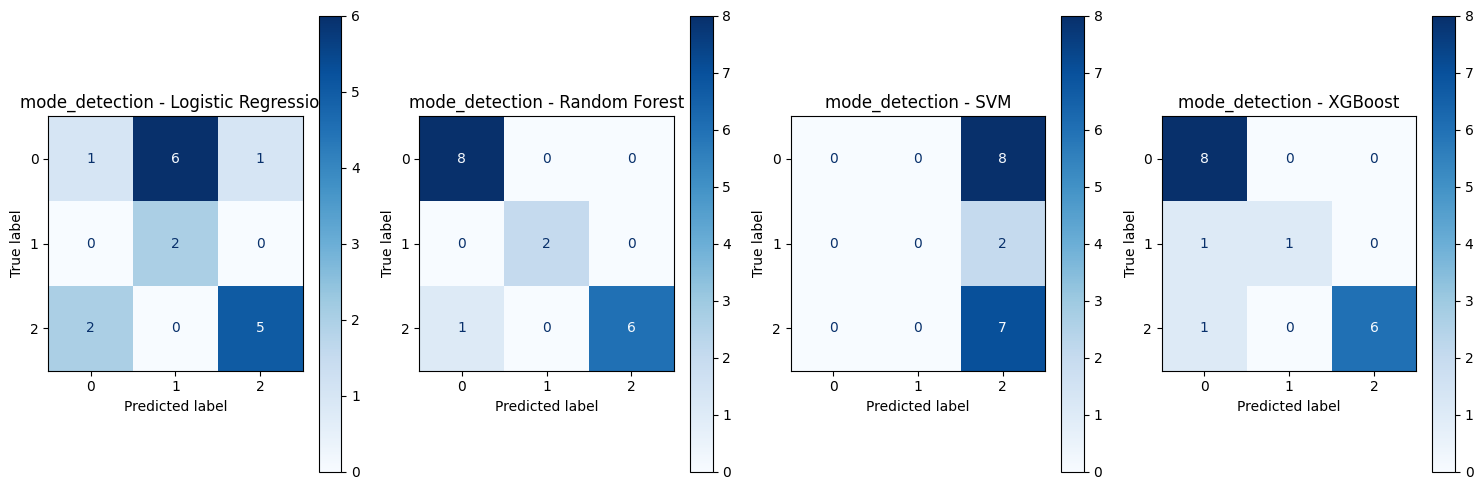

In [32]:

datasets = {
    'mode_detection': (my_data_1, my_labels_1)
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


# Train and plot results
fig, axes = plt.subplots(len(datasets), len(classifiers), figsize=(15, 5))

# Ensure axes is always a 2D array
if len(datasets) == 1:
    axes = np.expand_dims(axes, axis=0)
if len(classifiers) == 1:
    axes = np.expand_dims(axes, axis=1)

for row, (dataset_name, (X, y)) in enumerate(datasets.items()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    for col, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(X_train, y_train)
        ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=axes[row, col], cmap='Blues')
        axes[row, col].set_title(f'{dataset_name} - {clf_name}')

plt.tight_layout()
plt.show()

# Training with a true database
## 10 features

In [66]:
datasets_1 = {
    "geolife": load_csv_database("10_features.csv")
}

my_data_1, my_labels_1 = load_csv_database("10_features_from_our_data.csv")
    

[0 1 2]


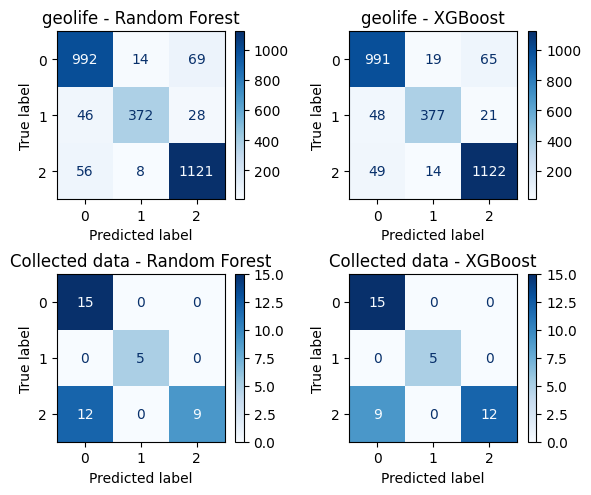

In [68]:
# Define classifiers
classifiers = {
    #'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    #'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(),
}

# Label encoder
label_encoder = LabelEncoder()

# Train and plot results
fig, axes = plt.subplots(len(datasets) + 1, len(classifiers), figsize=(6, 5))

# Ensure axes is always a 2D array
"""if len(datasets) == 1:
    axes = np.expand_dims(axes, axis=0)
if len(classifiers) == 1:
    axes = np.expand_dims(axes, axis=1)"""

for row, (dataset_name, (X, y)) in enumerate(datasets_1.items()):
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(label_encoder.classes_)

    for col, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(X_train, y_train)

        ConfusionMatrixDisplay.from_estimator(
            clf, X_test, y_test, ax=axes[row, col], 
            cmap='Blues', display_labels=label_encoder.classes_
        )
        axes[row, col].set_title(f'{dataset_name} - {clf_name}')


        ConfusionMatrixDisplay.from_estimator(
            clf, my_data_1, my_labels_1, ax=axes[row + 1, col],
            cmap='Blues', display_labels=label_encoder.classes_
        )
        axes[row + 1, col].set_title(f'Collected data - {clf_name}')
        

plt.tight_layout()
plt.show()

## 25 features (mostly speed and acceleration distributions)

In [62]:
datasets_2 = {
    "geolife": load_csv_database("distrib_features.csv")
}

my_data_2, my_labels_2 = load_csv_database("distrib_features_from_our_data.csv")

[0 1 2]


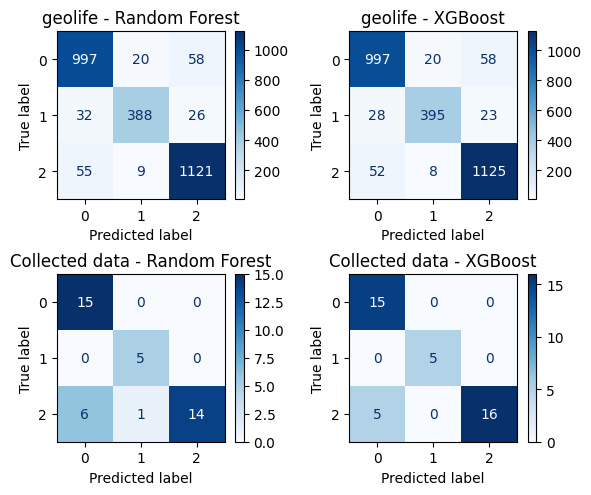

In [64]:
# Define classifiers
classifiers = {
    #'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    #'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(),
}

# Label encoder
label_encoder = LabelEncoder()

# Train and plot results
fig, axes = plt.subplots(len(datasets) + 1, len(classifiers), figsize=(6, 5))

# Ensure axes is always a 2D array
"""if len(datasets) == 1:
    axes = np.expand_dims(axes, axis=0)
if len(classifiers) == 1:
    axes = np.expand_dims(axes, axis=1)"""

for row, (dataset_name, (X, y)) in enumerate(datasets_2.items()):
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(label_encoder.classes_)

    for col, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(X_train, y_train)

        ConfusionMatrixDisplay.from_estimator(
            clf, X_test, y_test, ax=axes[row, col], 
            cmap='Blues', display_labels=label_encoder.classes_
        )
        axes[row, col].set_title(f'{dataset_name} - {clf_name}')


        ConfusionMatrixDisplay.from_estimator(
            clf, my_data_2, my_labels_2, ax=axes[row + 1, col],
            cmap='Blues', display_labels=label_encoder.classes_
        )
        axes[row + 1, col].set_title(f'Collected data - {clf_name}')
        

plt.tight_layout()
plt.show()